In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [3]:
!pip install -r requirements.txt

In [7]:
df=pd.read_csv('train.csv',encoding='unicode_escape')
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

In [8]:
df.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

since there are very less nan values so we can drop those rows which are nan

In [9]:
df.dropna(inplace=True)

In [10]:
df['Age of User']

0          0-20
1         21-30
2         31-45
3         46-60
4         60-70
          ...  
27476     31-45
27477     46-60
27478     60-70
27479    70-100
27480      0-20
Name: Age of User, Length: 27480, dtype: object

In [11]:
df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

There are 3 types of sentiments in the dataset

In [12]:
df["Age of User"].unique()

array(['0-20', '21-30', '31-45', '46-60', '60-70', '70-100'], dtype=object)

In [13]:
age_labels ={'0-20':0, '21-30':20, '31-45':31, '46-60':46, '60-70':60, '70-100':70}
df["Age of User"] = df["Age of User"].map(age_labels)

In [14]:
sentiment_labels ={'negative':1, 'neutral':2, 'positive':3}
df['sentiment']= df['sentiment'].map(sentiment_labels)

In [15]:
time_of_tweet_labels ={'morning':1, 'noon':2, 'night':3}
df['Time of Tweet']= df['Time of Tweet'].map(time_of_tweet_labels)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  int64  
 4   Time of Tweet     27480 non-null  int64  
 5   Age of User       27480 non-null  int64  
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.3+ MB


In [18]:
# There is no significance of this column
df.drop(["textID"],axis=1,inplace=True)

In [19]:
df.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  Time of Tweet  Age of User  \
0  I`d have responded, if I were going          2              1            0   
1                             Sooo SAD          1              2           20   
2                          bullying me          1              3           31   
3                       leave me alone          1              1           46   
4                        Sons of ****,          1              2           60   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

<Axes: xlabel='sentiment', ylabel='count'>

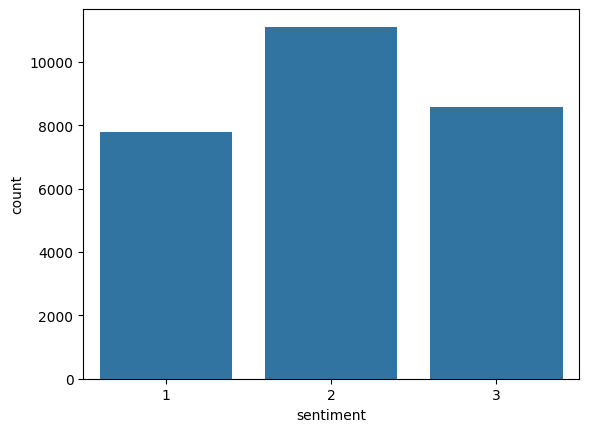

In [21]:
sns.countplot(x=df['sentiment'])

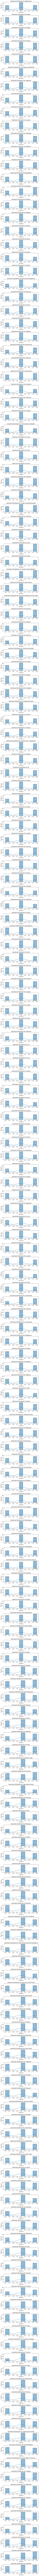

In [40]:
grouped = df.groupby('Country')

# Create a figure with subplots
fig, axs = plt.subplots(len(grouped), 1, figsize=(6, 2*len(grouped)))

# Iterate over each group
for i, (country, data) in enumerate(grouped):
    # Plot histogram for sentiment distribution for the current country
    sns.histplot(data['sentiment'], ax=axs[i], kde=True)
    axs[i].set_title(f'Sentiment Distribution for {country}')
    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

No dependendecy on Country . Almost all are distributed uniformly

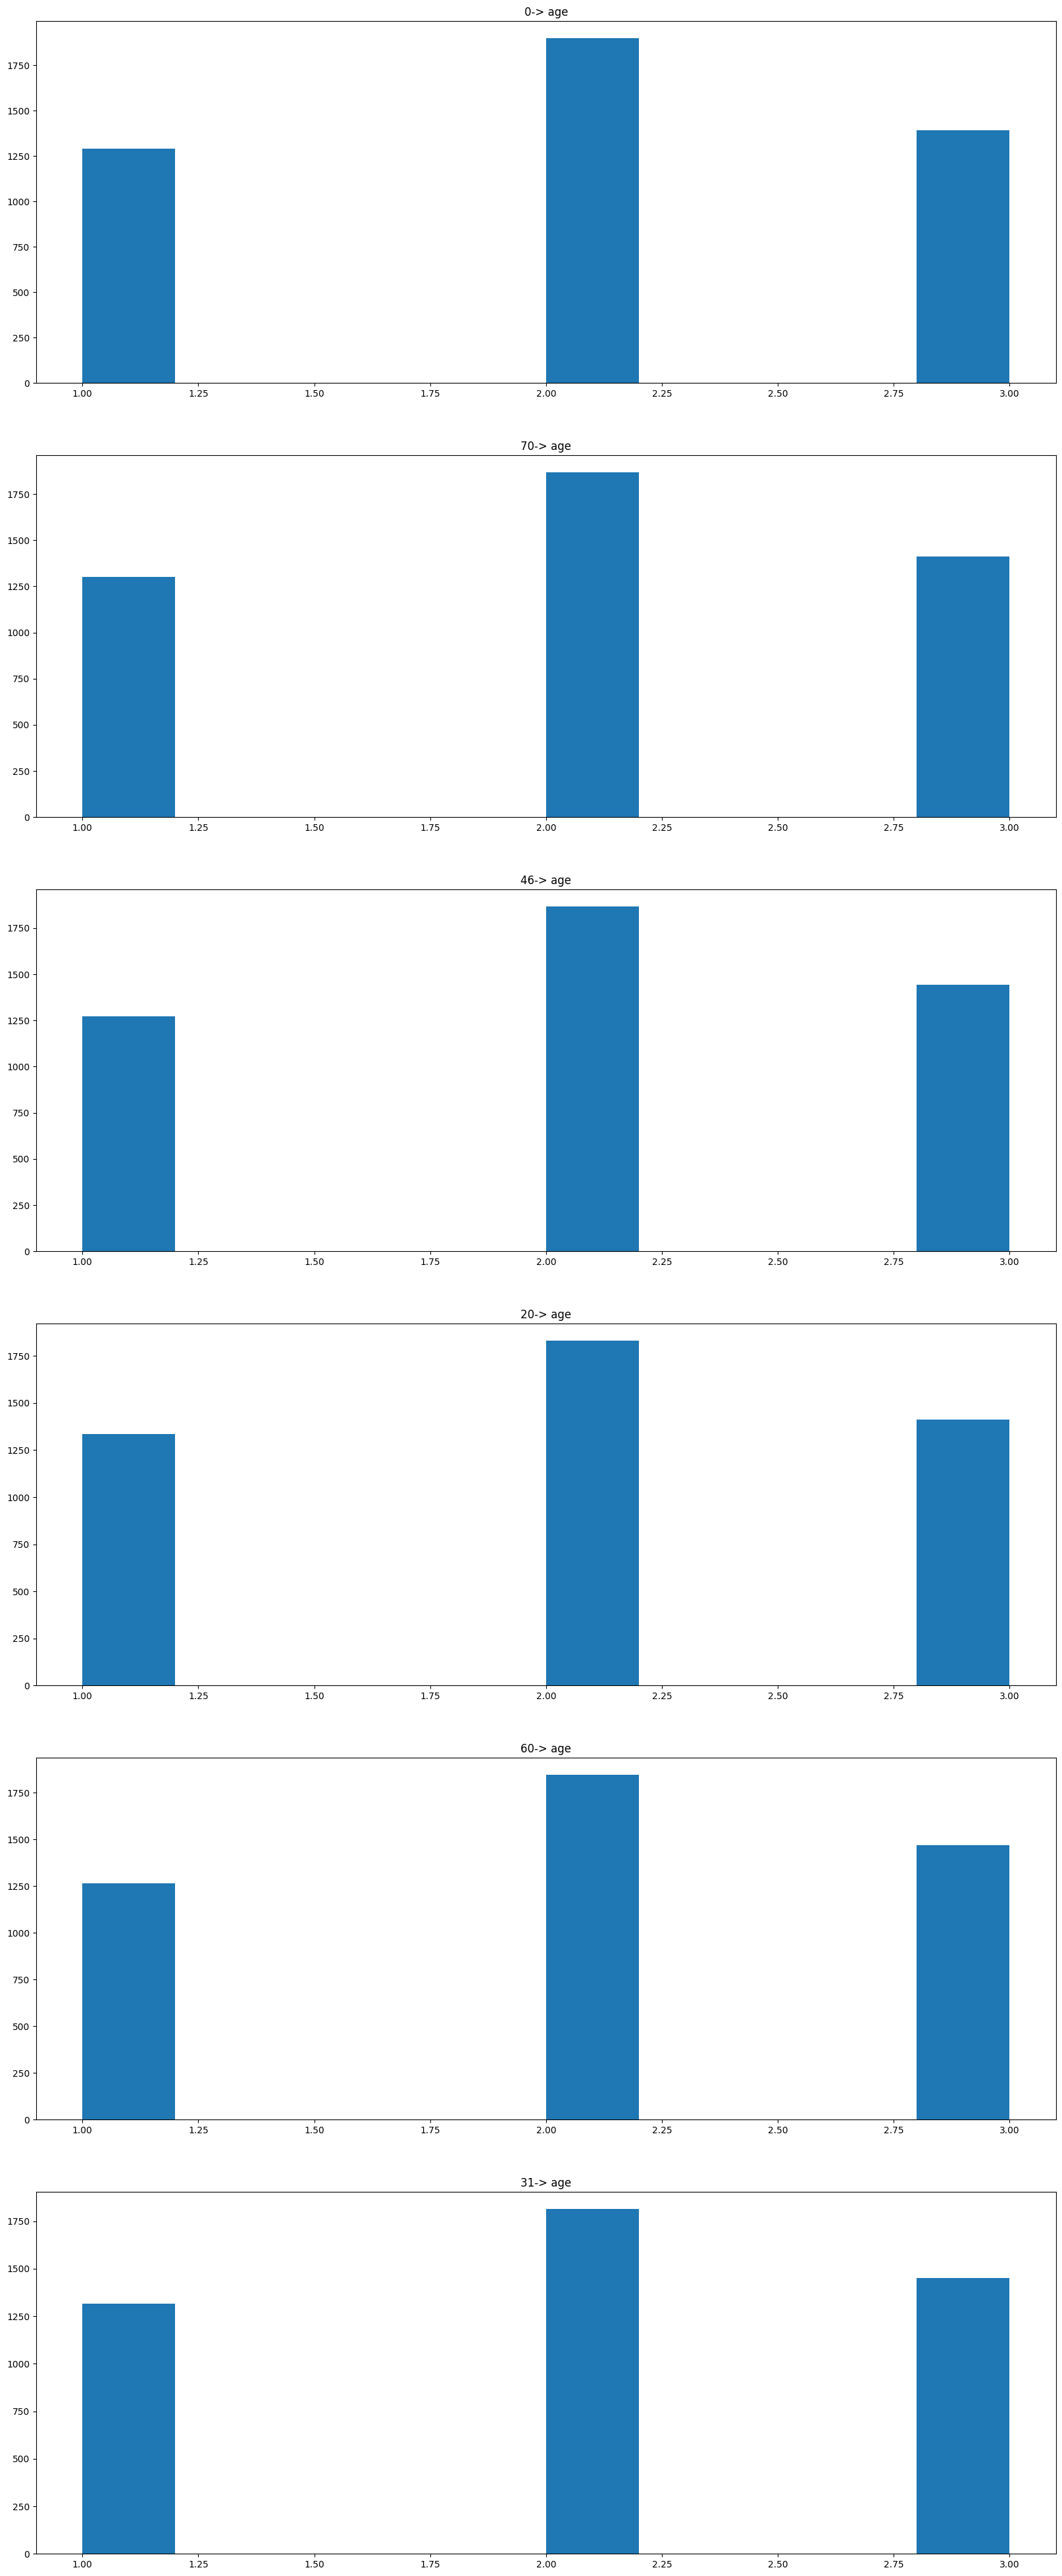

In [39]:
age=set(df['Age of User'])
age=list(age)
temp_df=[0]*len(age)
for i,ages in enumerate(age):
    temp_df[i]=df[df['Age of User']==ages]
fig=plt.figure(figsize=(20,50))
ax2 = fig.subplots(6,1)
for i in range(6):
    ax2[i].hist(temp_df[i]['sentiment'])
    ax2[i].set_title(str(age[i])+'-> age')
        # ax1[i,j].

evenly distribution of sentiment inn age but it is slighly titled toward neutral 

In [41]:
df.drop(labels=['Country'],inplace=True,axis=1)
df.drop(labels=['Age of User'],axis=1,inplace=True)

In [42]:
df.duplicated().any()

False

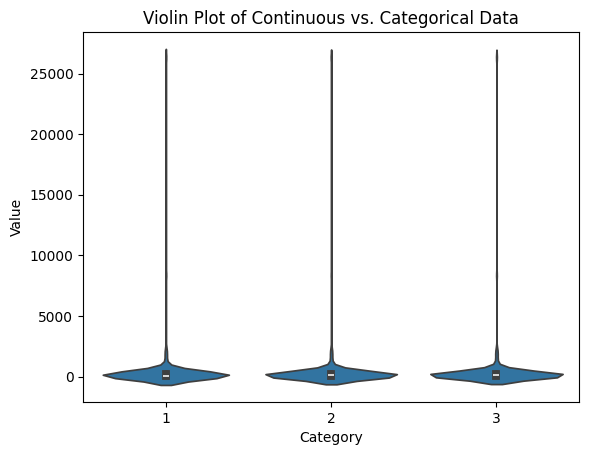

In [46]:
sns.violinplot(x='sentiment', y='Density (P/Km²)', data=df)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot of Continuous vs. Categorical Data')
plt.show()

As we can see that the median represented vy white dot is same for all the sentiment accross distribution so the Density does not  add any new information.

In [47]:
df.drop(['Density (P/Km²)'],inplace=True,axis=1)

In [48]:
df.drop(['Land Area (Km²)'],inplace=True,axis=1)

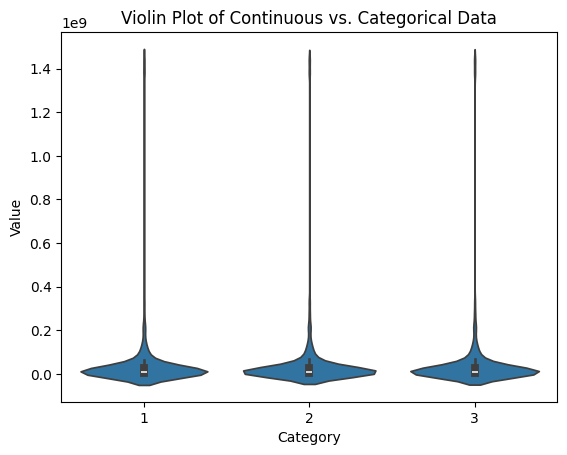

In [50]:
sns.violinplot(x='sentiment', y='Population -2020', data=df)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot of Continuous vs. Categorical Data')
plt.show()

In [51]:
df.drop(['Population -2020'],axis=1,inplace=True)

In [52]:
df.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  Time of Tweet  
0  I`d have responded, if I were going          2              1  
1                             Sooo SAD          1              2  
2                          bullying me          1              3  
3                       leave me alone          1              1  
4                        Sons of ****,          1              2

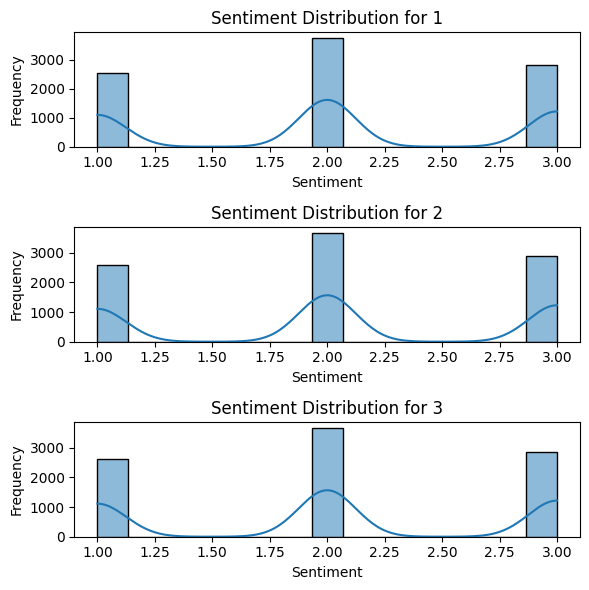

In [53]:
grouped = df.groupby('Time of Tweet')

# Create a figure with subplots
fig, axs = plt.subplots(len(grouped), 1, figsize=(6, 2*len(grouped)))

# Iterate over each group
for i, (country, data) in enumerate(grouped):
    # Plot histogram for sentiment distribution for the current country
    sns.histplot(data['sentiment'], ax=axs[i], kde=True)
    axs[i].set_title(f'Sentiment Distribution for {country}')
    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see that there is not much time difference in the sentiment in the Time of Tweet.
So we can reject them as there is not much bisases toward any sentiment among all Tweets

In [55]:
df.drop(["Time of Tweet"],axis=1,inplace=True)

In [56]:
df.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  
0  I`d have responded, if I were going          2  
1                             Sooo SAD          1  
2                          bullying me          1  
3                       leave me alone          1  
4                        Sons of ****,          1